$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\tv}{\mathbf{t}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Im}{\mathbf{I}}
$

# Evaluation

<br/><br/><br/><br/>

### ITCS5156
### Spring 2021

### Minwoo "Jake" Lee



# Review


<table>
    <tr>
        <td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png" width=400 />
        </td>
        <td>
<img src="https://i.stack.imgur.com/3Aw4C.png" width=400 />
        </td>
    </tr>
</table>





# Today

                
* Metric for Regression                
                
* Metric for Classification

* Other evaluations
  * Learning Curve
  * Cross-Validation

    <img src="https://miro.medium.com/max/2625/1*3Hp-roR8H1SFvbTlzxuZLg.png" width=400 />


# Classification Metrics

- Accuracy
- Confusion Matrix
- Precision and Recall
- F1 Score
- Matthews Correlation Coefficient (MCC)
- The ROC Curve
- AUC

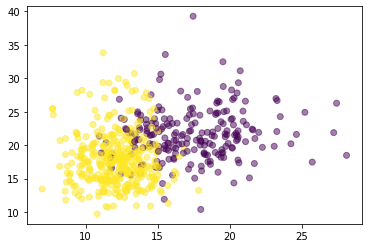

In [ ]:
# Breast cancer dataset for examples

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, t = data.data, data.target
#X, t = load_breast_cancer(return_X_y=True)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=t, alpha=0.5)

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2)


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# train the model
model = Pipeline([('scaler', StandardScaler()),
                ('classifier', LinearSVC(tol=1e-3, random_state=0))])
model = model.fit(X_train, t_train)

y_train = model.predict(X_train)
y_test = model.predict(X_test)

# Accuracy


$$
   \text{Accuracy} = \frac{\text{The number of correct classification}}{\text{The number of samples}}
$$

In [ ]:
model.score(X_test, t_test)

0.9649122807017544

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(t_test, y_test)

0.9649122807017544

In [ ]:
np.unique(t, return_counts=True)

(array([0, 1]), array([212, 357]))

In [ ]:
np.unique(t_test, return_counts=True)

(array([0, 1]), array([47, 67]))

In [ ]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(t_test, y_test)

0.9637980311209908

# Confusion Matrix

- Shows the actual counts for predicted classes vs actual classes


<table>
    <thead>
        <tr>
            <th></th>
            <th colspan=3><center>Actual</center></th>
        </tr>
        <tr>
            <th></th>
            <th></th>
            <th>-</th>
            <th>+</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan=2>Predicted</td>
            <td >-</td>
            <td>439</td>
            <td>28</td>
        </tr>
        <tr>
            <td >+</td>
            <td>22</td>
            <td>511</td>
        </tr>
    </tbody>
</table>    



 - | Red | Blue | Green
 --|--|--|--
 Red | 100 | 18 | 12
 Blue | 21 | 50 | 24
 Green | 15 | 23 | 503


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(t_test, y_test)
cm

array([[45,  2],
       [ 2, 65]])

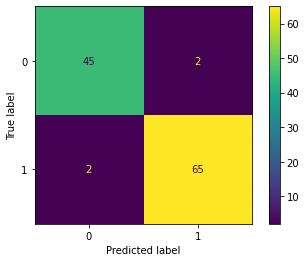

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(cm).plot()

# Terminology


    
<table>
    <thead>
        <tr>
            <th></th>
            <th colspan=3><center>Actual</center></th>
        </tr>
        <tr>
            <th></th>
            <t  </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan=2>Predicted</td>
            <td >-</td>
            <td>True Negative (TN)</td>
            <td>False Negative (FN)</td>
        </tr>
        <tr>
            <td >+</td>
            <td>False Positive (FP)</td>
            <td>True Positive (TP)</td>
        </tr>
    </tbody>
</table>    

# Precision, Recall, and Specificity

- **Precision**: The accuracy of positive predictions. We can read this as *the ratio that my positive prediction is correct*.

$$
\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

- **Recall** (Sensitivity or True Positive Rate): This measure give you how the model's prediction covers the positive class.

$$
\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

- **Specificity** (True Negative Rate): Considering imblance or difference in class, we consider TNR as well.

$$
\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$

# $F_1$ Score

- A single measure that combines precision and recall
- harmonic mean of precion and recall

$$
\begin{align*}
F_1 &= \Bigg( \frac{\frac{1}{precision} + \frac{1}{recall}}{2} \Bigg)^{-1} \\
\\
    &= 2 \times \frac{precision \times recall}{precision + recall} \\
    \\
    &= \frac{TP}{TP + \frac{FN+FP}{2}}
\end{align*}
$$

# Matthews Correlation Coefficient (MCC)

- Use all the counts in the confusion matrix
- A single measure


$$
MCC = \frac{TP \times TN – FP \times FN}{\sqrt{(TP +FP) \times (TP + FN) \times (TN + FP) \times (TN + FN)}}
$$

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef

print("Precision:", precision_score(t_test, y_test))
print("Recall:", recall_score(t_test, y_test))
print("F1:", f1_score(t_test, y_test))
print("MCC:", matthews_corrcoef(t_test, y_test))

Precision: 0.9701492537313433
Recall: 0.9701492537313433
F1: 0.9701492537313433
MCC: 0.9275960622419815


# The ROC (Receiver Operating Characteristic) Curve

- True Positive Rate (TPR) against False Positive Rate (FPR)
- Independent to the selection of the thershold
- Shows the TPR and FPR for varying thershold

# ROC Curve

![](https://upload.wikimedia.org/wikipedia/commons/4/4f/ROC_curves.svg)
(image from wikipedia)

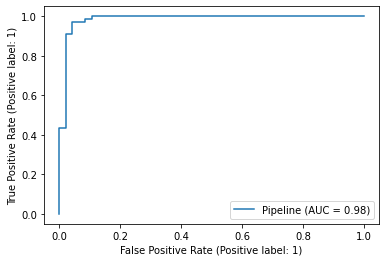

In [ ]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_test, t_test)

# ROC Curve

## How does the ROC curve look like?

- A perfect classifer
- A random classifier

# Area Under the Curve (AUC)

- summarizes the ROC curve with a numerical value
- A probability that a positive example will get a higher score than a negative score.

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(t_test, y_test)

0.9637980311209908

# Classification Report



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(t_test, y_test, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.96      0.96      0.96        47
      benign       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(t_test, y_test, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.96      0.96      0.96        47
      benign       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



# Toy data: Imbalanced

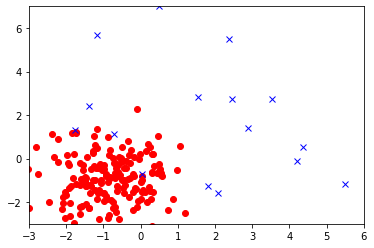

In [ ]:
nC1 = 180
nC2 = 20
N = nC1 + nC2

# Example data
mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 10

C1 = np.random.multivariate_normal(mu1, cov1, nC1)
C2 = np.random.multivariate_normal(mu2, cov2, nC2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])

X = np.vstack((C1, C2))
T = np.ones(N)
T[:nC1] *= -1

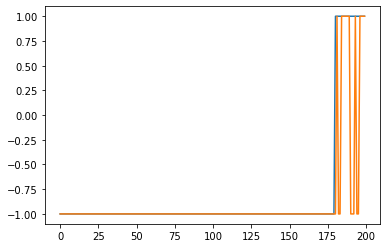

In [ ]:
# train the model
svc = Pipeline([('scaler', StandardScaler()),
                ('classifier', LinearSVC(tol=1e-3, random_state=0))])
svc.fit(X, T)
Y = svc.predict(X)

plt.plot(T)
plt.plot(Y)



Text(0.5, 1.0, 'PR Curve')

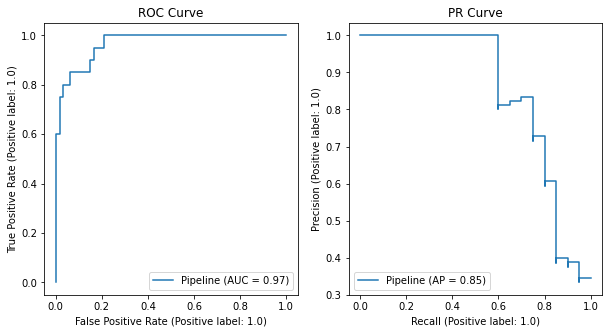

In [ ]:
from sklearn.metrics import plot_precision_recall_curve


plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
dp1 = plot_roc_curve(svc, X, T, ax=ax1)
plt.title("ROC Curve")
ax2 = plt.subplot(122)
dp2= plot_precision_recall_curve(svc, X, T, ax=ax2)
plt.title("PR Curve")


# PR vs ROC


>  "You should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives, and the ROC curve otherwise."
>    from the Geron's book      

##  Cheat Sheet

http://www.damienfrancois.be/blog/files/modelperfcheatsheet.pdf

# Regression Metrics



- mean absolute error (MAE) = $\frac{1}{N} \sum \vert t - y \vert$
  - simple & intuitive sum of residuals

- mean squared error (MSE) = $\frac{1}{N} \sum (t - y)^2$
  - outliers are highly penalized than MAE
  - why RMSE?

# Regression Measures (cont')

- mean absolute percentage error (MAPE) = $\frac{100 \%}{N} \sum \vert \frac{t - y}{t} \vert$
  - scaling with the actual target values
  - biased towards less values than target

- mean percentage error (MPE) = $\frac{100 \%}{N} \sum \big( \frac{t - y}{t} \big)$
  - absence of absolute values: not good estimation of overall performance
  - tells us if a model **underestimates** or **overestimates** (systematic errors)

- max error (ME) = $\max( \vert t - y \vert)$
  - tells the extent of error

# Regression Measures (cont')

- R-squared ($R^2$) error = $1 - \frac{\text{Variation of Errors (residuals)}}{\text{Total Variation}} = 1 - \frac{\sum_i (y_i - t_i)^2}{\sum_i (y_i - \bar{y})^2}$
  - comparison of varirances
  - how to read? - 100% means the model explains all the variability of the response around the mean

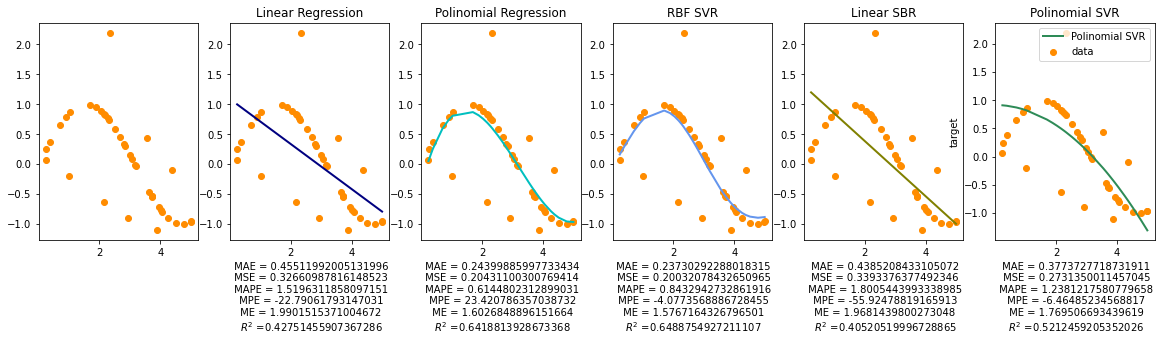

In [ ]:
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, max_error, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
t = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
t[::5] += 3 * (0.5 - np.random.rand(8))


names = ["Linear Regression", "Polinomial Regression", "RBF SVR",
         "Linear SVR", "Polinomial SVR"]
colors = ["navy", "c", "cornflowerblue", "olive", "seagreen"]

# #############################################################################
# Regression models
regressors = [
    LinearRegression(),
    Pipeline([('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression(fit_intercept=False))]),
    SVR(kernel='rbf', C=1e3, gamma=0.1),
    SVR(kernel='linear', C=1e3),
    SVR(kernel='poly', C=1e3, degree=2)
]

i = 1

plt.figure(figsize=(20,4))
plt.subplot(1, len(regressors) + 1, i)
plt.scatter(X, t, color='darkorange', label='data')
lw = 2

for name, color, regr in zip(names, colors, regressors):


    # #############################################################################
    # Fit regression model
    regr.fit(X, t)
    # #############################################################################
    # Prediction
    y = regr.predict(X)

    # #############################################################################
    # Look at the results
    i += 1
    plt.subplot(1, len(regressors) + 1, i)
    plt.scatter(X, t, color='darkorange', label='data')
    plt.plot(X, y, color=color, lw=lw, label=name)

    # #############################################################################
    # Regression Measures
    R2 = r2_score(t, y)
    ME = max_error(t, y)
    MAE = mean_absolute_error(t, y)
    MSE = mean_squared_error(t, y)
    MAPE = mean_absolute_percentage_error(t, y)

#     MAE = np.mean(np.abs(t-y))
#     MSE = np.mean((t-y)**2)
#     MAPE = 100 * np.mean(np.abs((t-y)/t))
    MPE = 100 * np.mean((t-y)/t)
#     R2 = 1 - np.sum((y-t)**2) / np.sum((t - np.mean(t))**2)
    #print("R2 = ", R2)
    s_title =   " MAE = " + str(MAE) +\
                "\n MSE = " + str(MSE) +\
                "\n MAPE = " + str(MAPE) +\
                "\n MPE = " + str(MPE) +\
                "\n ME = " + str(ME) +\
                "\n $R^2$ =" + str(R2)
    plt.title(name)
    plt.xlabel(s_title)
plt.ylabel('target')
plt.legend()
plt.show()

# Learning Curve

* plot changes of a model's learning performance over time or experience.
* Diagnose problem of learning such as
  * stability - with noisy trends
  * speed - quick or slow convergence
  * underfit/overfit - with validation set.
  * quality of data

Text(0.5, 1.0, 'Noisy Learning')

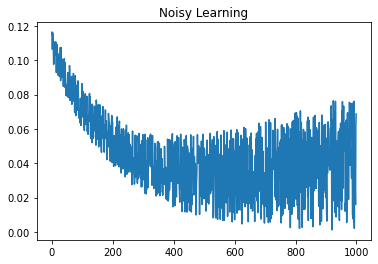

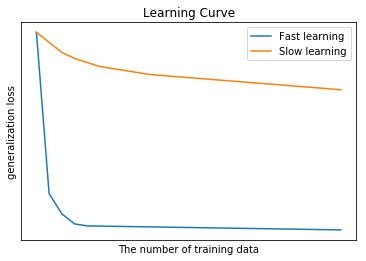

Text(0.5, 0.98, 'Underfitting')

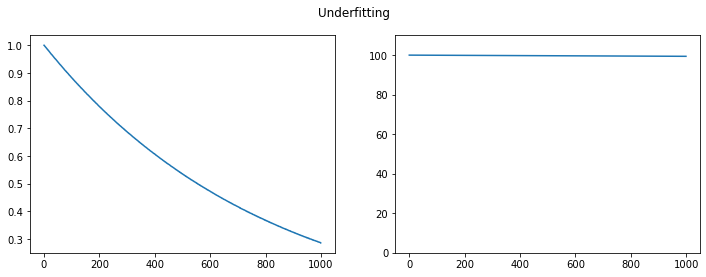

Text(0.5, 0.98, 'Overfitting')

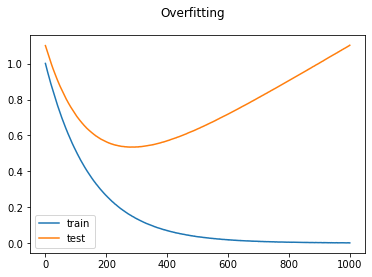

Text(0.5, 1.0, 'Underrepresentative Validation Set')

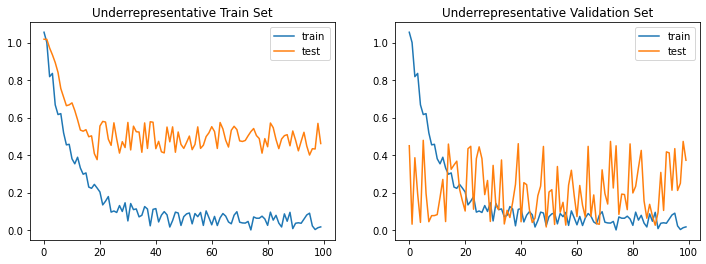

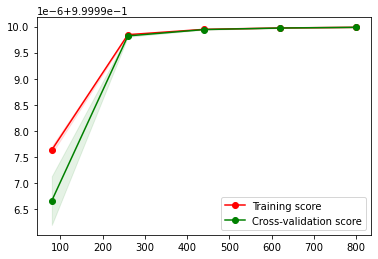

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

X, t = make_regression(1000, 10)  # 1000 x 10

test_ridge = Ridge(alpha=0.1)
train_sizes = np.linspace(0.1, 1., 5)
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(test_ridge, X, t,
                                                                      train_sizes=train_sizes,
                                                                      cv=5,
                                                                      return_times=True)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")


# Polynomial Regression


- Linear Model

$$ f(\xv; \wv) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 $$


- Polynomial

$$ f(\xv; \wv) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 +  w_4 x_1^2 + w_5 x_2^2 + w_6 x_3^2 +  w_7 x_1^3 + w_8 x_2^3 + w_9 x_3^3 + \cdots $$


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from copy import deepcopy as copy

# training points
X = np.arange(3).reshape((-1 ,1))
t = copy(X)
print(X)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_poly

[[0]
 [1]
 [2]]


array([[1., 0., 0., 0.],
       [1., 1., 1., 1.],
       [1., 2., 4., 8.]])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline



# Training two models
reg_l = LinearRegression()
reg_p = Pipeline([('poly', PolynomialFeatures(degree=3)), ('regr', LinearRegression(fit_intercept=False))])
reg_l.fit(X, t)
reg_p.fit(X, t)

np.set_printoptions(precision=4, suppress=True)
print("Linear Train Score:", reg_l.score(X, t))
print("Poly Train Score:",reg_p.score(X, t))
print(reg_p.named_steps['regr'].coef_)



Linear Train Score: 1.0
Poly Train Score: 1.0
[[-0.      0.7143  0.4286 -0.1429]]


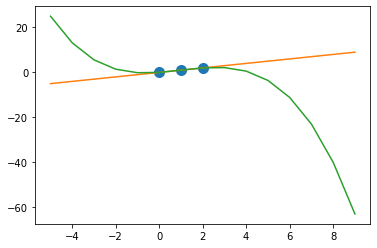

In [ ]:
# scatter plot
def plot_data():
    plt.plot(X, t, "o", markersize=10)

# Test data
X_test = np.arange(15).reshape((-1,1)) - 5
y_test = reg_l.predict(X_test)
yp_test = reg_p.predict(X_test)

plot_data()
plt.plot(X_test, y_test)
plt.plot(X_test, yp_test)



In [ ]:
!curl https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/lifesat/oecd_bli_2015.csv > oecd_bli_2015.csv

In [ ]:
!curl https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/lifesat/gdp_per_capita.csv > gdp_per_capita.csv

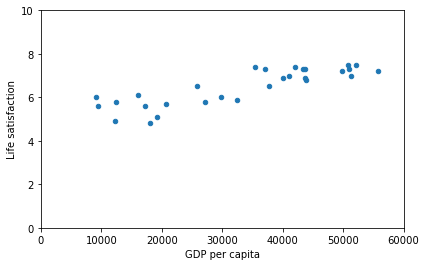

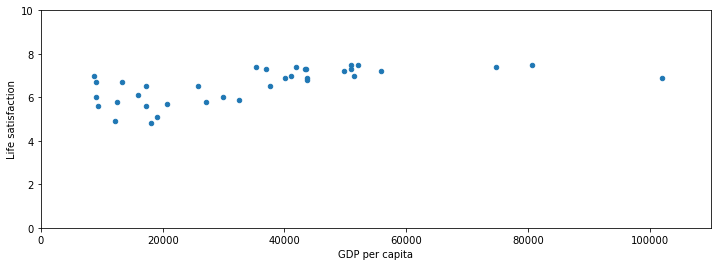

In [ ]:
import os
import pandas as pd
import sklearn

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices], full_country_stats[["GDP per capita", 'Life satisfaction']]


# Load the data
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")


# Prepare the data
country_stats, full_country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(6.5,4))
plt.axis([0, 60000, 0, 10])
plt.show()


# Data for training
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]

# Visualize the full data
# Visualize the data
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(12,4))
plt.axis([0, 110000, 0, 10])
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# polynomial model to this data

def fit_poly(deg):
    plt.figure();
    full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction',
                            figsize=(12,4));
    plt.axis([0, 110000, 3, 10]);

    reg = Pipeline([('scale', StandardScaler()),
                    ('poly', PolynomialFeatures(degree=deg)),
                    ('regr', LinearRegression(fit_intercept=False))])

    reg.fit(Xfull, yfull)
    yp = reg.predict(Xfull)

    # plot curve
    plt.plot(Xfull, yp, 'r-', label=deg);
    plt.title("degree: {}".format(deg));



<Figure size 432x288 with 0 Axes>

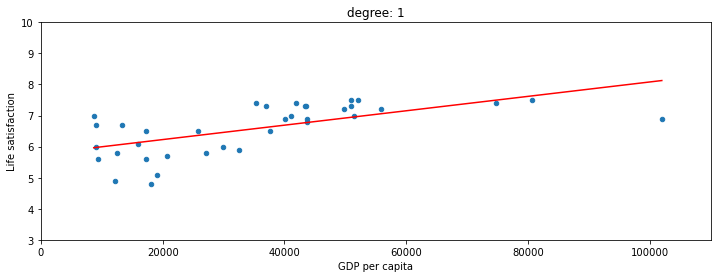

In [ ]:
fit_poly(1)

<Figure size 432x288 with 0 Axes>

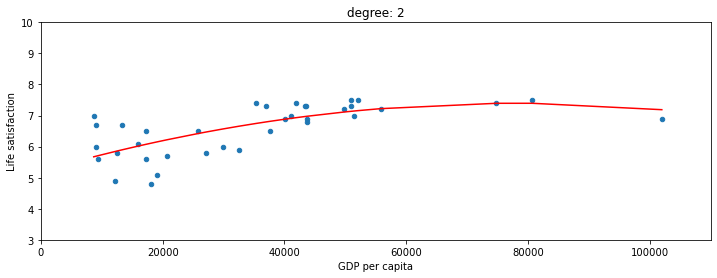

In [ ]:
fit_poly(2)

<Figure size 432x288 with 0 Axes>

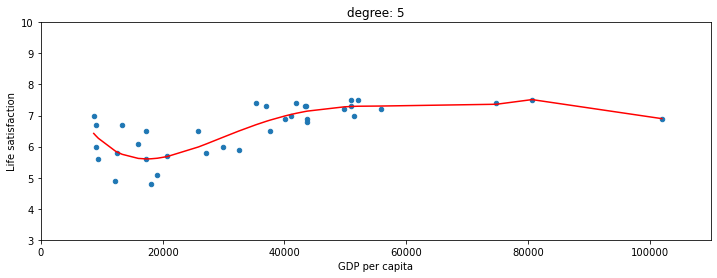

In [ ]:
fit_poly(5)

<Figure size 432x288 with 0 Axes>

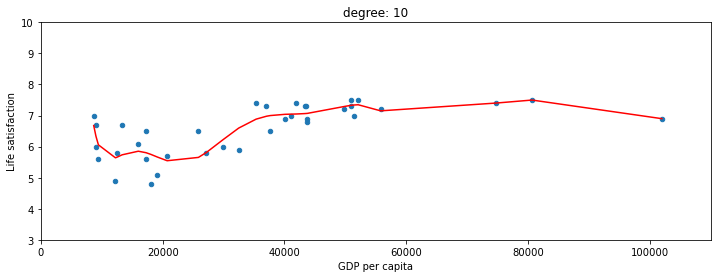

In [ ]:
fit_poly(10)

<Figure size 432x288 with 0 Axes>

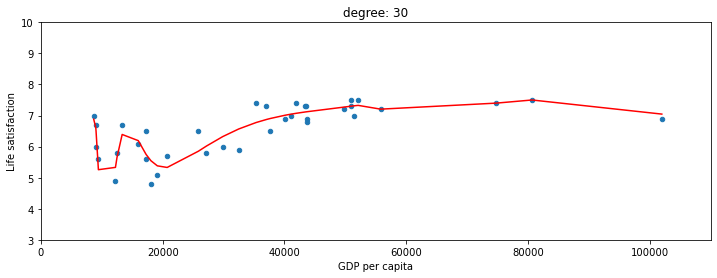

In [ ]:
fit_poly(30)

# Overfitting


* learned hypothesis $h$
* hypothesis from another model $h^\prime$

$$ E_{train}(h) < E_{train}(h^\prime) \wedge E_{test}(h) > E_{test}(h^\prime).$$


# Bias-Variance Tradeoff


- high bias error: under-performing model that misses the important trends
- high variance error: excessively sensitive to small variations in the training data
- Irreducible error: genuine to the noise in the data. Need to clean up the data

![](http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/bias-and-variance.jpg)
<center>From Understanding the Bias-Variance Tradeoff, by Scott Fortmann-Roe</center>

# Regularization



# Occam's razor

> entities must not be multiplied beyond necessity

<img width=500 src="https://hunter-iq.com/wp-content/uploads/sites/4/2016/09/hiqoccamsrazor.png"/>


# k-fold Cross Validation

![image.png](attachment:image.png)

<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" width=700 />

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width=700 />

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, t_train, cv=5)

print(scores)

[0.9341 0.967  0.978  0.956  0.978 ]


In [ ]:
print(u"CV Error: {:.3f} \u00B1 {:.3f}".format(scores.mean(), scores.std()))

CV Error: 0.963 ± 0.016


# Next: Rule-Based Learning


<img src="https://miro.medium.com/max/3200/1*-XBxuOgB5j0irQiB9dRubA.jpeg" width=500 />
